#### Creando la nube de puntos

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
m = 300
x = 2 * np.random.rand(m, 1)
y = 2 + 3*x + x**2 + 1.5*np.random.randn(m, 1)

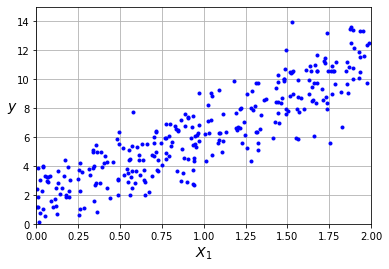

In [87]:
plt.plot(x, y, "b.")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(x)

In [89]:
pr.fit(X_quad, y)

LinearRegression()

In [ ]:
x_i = np.arange(0,10,0.02)

In [62]:
def normal_equation_ply(X, Y, percent):
    '''Esta función sirve para utilizar el método de regresión lineal con ecuación normal
    normal_equation(X, Y, percent): 
    X: DataFrame
    Y: DataFrame
    percent: % de datos que seran utilizados para el test (base 100)
    
    Return: theta, test_index, train_index, Y_predict
    
    test_index: indices de los valores utilizados para el test
    train_index: indices de los valores utilizados para el entrenamiento
    theta: valores correspondientes a theta_n
    Y_predict: valores de Y obtenidos de la predicción
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    train_index = list(np.arange(0, m)) 
    
    for indice in test_index:
        train_index.remove(indice)

    X_train = np.c_[X.iloc[train_index]]
    X_test = np.c_[X.iloc[test_index]]
    Y_train = np.c_[Y.iloc[train_index]]
    Y_test = np.c_[Y.iloc[test_index]]
    
    # Entrenamiento
    m = len(X_train)
    
    X_b = np.c_[X_train]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_train
    
    # test
    
    m = len(X_test)
    
    X_b_test = np.c_[X_test]
    Y_predict = X_b_test @ theta
    
    return theta, test_index, train_index, Y_predict

In [63]:
X_quad = pd.DataFrame(X_quad)
y = pd.DataFrame(y)
theta, test_index, train_index, Y_predict = normal_equation_ply(X_quad, y, 20)
x = pd.DataFrame(x)

In [64]:
theta

array([[1.85159703],
       [2.91477356],
       [1.19997569]])

In [69]:
def cuadratic_fun(theta, x):
    return theta[0] + theta[1]*x + theta[2]*x**2

In [73]:
x_1 = np.arange(0,10,0.02)

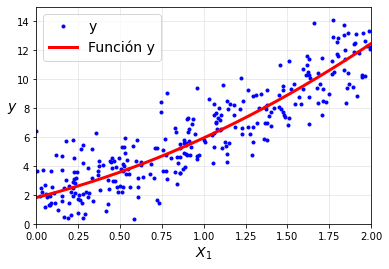

In [82]:
plt.plot(np.c_[x], np.c_[y], "b.", label = 'y')
plt.plot(x_1, cuadratic_fun(theta, x_1), "r-", linewidth=3, label="Función y")
#plt.plot(np.c_[x.iloc[test_index]], Y_predict, "r-", linewidth=2, label="Función y")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(alpha= 0.3)
plt.show()

In [84]:
from sklearn import metrics

print(f'MAE: {metrics.mean_absolute_error(np.c_[y.iloc[test_index]], Y_predict)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(np.c_[y.iloc[test_index]], Y_predict)}')
print(f'R²: {round(metrics.r2_score(np.c_[y.iloc[test_index]], Y_predict), 2)}')

MAE: 1.067060232352341
MAPE: 0.4390688740338333
R²: 0.83
